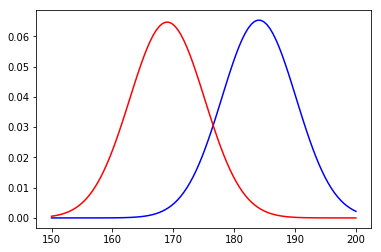

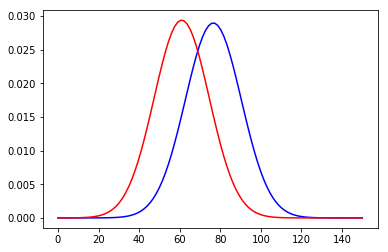

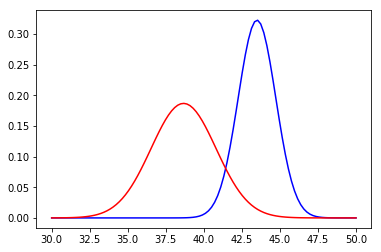

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as ml

data = ml.csv2rec('biometrie2014.csv', delimiter=',', skiprows=0)
data = np.array(list(map(list, data)))

maleIndices = np.where(data[:, 0] == 'M ')[0]
maleData = data[maleIndices, 1:].astype(np.float)

femaleIndices = np.where(data[:, 0] == 'F')[0]
femaleData = data[femaleIndices, 1:].astype(np.float)

keys = ['W', 'L', 'S']
means = {'M': {}, 'F': {}}
sd = {'M': {}, 'F': {}}
for i in range(3):
    means['M'][keys[i]] = np.mean(maleData[:, i])
    means['F'][keys[i]] = np.mean(femaleData[:, i])
    
    sd['M'][keys[i]] = np.std(maleData[:, i])
    sd['F'][keys[i]] = np.std(femaleData[:, i])

def normal_pdf(mu, sigma):
    def _inner_func(x):
        return 1 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return _inner_func
  
pdfs = {'M': {}, 'F': {}}
for X in pdfs:
    for k in keys:
        pdfs[X][k] = normal_pdf(means[X][k], sd[X][k])

def whoami(W, L, S):
    inputs = {'W': W, 'L': L, 'S': S}
    maleProb = femaleProb = 0
    for k in keys:
        maleProb += pdfs['M'][k](inputs[k])
        femaleProb += pdfs['F'][k](inputs[k])
    maleProb /= 3
    femaleProb /= 3
    
    return maleProb >= femaleProb
    

x = np.linspace(150, 200, 100)
plt.figure()
plt.plot(x, pdfs['M']['L'](x), 'b-')
plt.plot(x, pdfs['F']['L'](x), 'r-')
plt.show()

x = np.linspace(0, 150, 100)
plt.figure()
plt.plot(x, pdfs['M']['W'](x), 'b-')
plt.plot(x, pdfs['F']['W'](x), 'r-')
plt.show()

x = np.linspace(30, 50, 100)
plt.figure()
plt.plot(x, pdfs['M']['S'](x), 'b-')
plt.plot(x, pdfs['F']['S'](x), 'r-')
plt.show()